In [1]:
#look at ENSO events in the JRA-55 ACCESS=OM2-01-IAF runs

In [2]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath

In [3]:
client = Client(n_workers=8)
client

<Client: 'tcp://127.0.0.1:43023' processes=8 threads=8, memory=100.00 GiB>

In [4]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')

In [5]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer #(session=session)
dbx

cosima_cookbook.explore.DatabaseExplorer

In [6]:
ee = explore.ExperimentExplorer(session=session, experiment='01deg_jra55v140_iaf')
ee

ExperimentExplorer(children=(HTML(value='\n            <h3>Experiment Explorer</h3>\n\n            <p>Select a…

In [7]:
#cc.querying.get_experiments(session)

In [8]:
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='gray', linewidth=0.5)

In [9]:
expt='01deg_jra55v140_iaf'
variable='ht'
ht = cc.querying.getvar('01deg_jra55v140_iaf','ht',session,n=1).sel(yt_ocean=slice(-90,-55))
#ht = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
ht.load()
print(ht.shape)

variable='hu'
hu = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
hu.load()
print(hu.shape)

(584, 3600)
(2700, 3600)


In [10]:
expt='01deg_jra55v140_iaf'
variable='xt_ocean'
xt_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
xt_ocean.load()
print(xt_ocean.shape)

expt='01deg_jra55v140_iaf'
variable='yt_ocean'
yt_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
yt_ocean.load()
print(yt_ocean.shape)

variable='area_t'
area_t = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
area_t.load()
print(area_t.shape)

variable='xu_ocean'
xu_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
xu_ocean.load()
print(xu_ocean.values)

variable='yu_ocean'
yu_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
yu_ocean.load()
print(yu_ocean.shape)

variable='area_u'
area_u = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
area_u.load()
print(area_u.shape)

(3600,)
(2700,)
(2700, 3600)
[-280 -280 -280 ...   78   78   79]
(2700,)
(2700, 3600)


In [11]:
#do maskito_netcdfepths = (0,300)
#htmask = temp.where(~xr.ufuncs.isfinite(temp.where(ht>1000)))
#htmask = ~xr.ufuncs.isnan(htmask).to_dataset(name='htmask')
#htmask

#var.where((var.lat<5) & (var.lat>-5) & (var.lon>190) & (var.lon<240),drop=True

tmask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
tmask = tmask.where(~xr.ufuncs.isfinite(tmask.where(yt_ocean>-60)))
tmask = ~xr.ufuncs.isnan(tmask).to_dataset(name='tmask')

#wap_mask = ht.where(~xr.ufuncs.isfinite(ht.where( (ht>1000) & (yt_ocean>-60) & (xt_ocean<-75) & (xt_ocean>-63) )))
wap_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
wap_mask = wap_mask.where(~xr.ufuncs.isfinite(wap_mask.where(yt_ocean>-60)))
wap_mask=wap_mask.where(~xr.ufuncs.isfinite(wap_mask.where(xt_ocean<-75)))
wap_mask=wap_mask.where(~xr.ufuncs.isfinite(wap_mask.where(xt_ocean>-63)))
wap_mask = ~xr.ufuncs.isnan(wap_mask).to_dataset(name='wap_mask')

#bs_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-101) & (xt_ocean>-76) )))
bs_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
bs_mask = bs_mask.where(~xr.ufuncs.isfinite(bs_mask.where(yt_ocean>-60)))
bs_mask=bs_mask.where(~xr.ufuncs.isfinite(bs_mask.where(xt_ocean<-101)))
bs_mask=bs_mask.where(~xr.ufuncs.isfinite(bs_mask.where(xt_ocean>-76)))
bs_mask = ~xr.ufuncs.isnan(bs_mask).to_dataset(name='bs_mask')

#as_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-127) & (xt_ocean>-102) )))
as_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
as_mask = as_mask.where(~xr.ufuncs.isfinite(as_mask.where(yt_ocean>-60)))
as_mask=as_mask.where(~xr.ufuncs.isfinite(as_mask.where(xt_ocean<-127)))
as_mask=as_mask.where(~xr.ufuncs.isfinite(as_mask.where(xt_ocean>-102)))
as_mask = ~xr.ufuncs.isnan(as_mask).to_dataset(name='as_mask')

#mb_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-158) & (xt_ocean>-103) )))
mb_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
mb_mask = mb_mask.where(~xr.ufuncs.isfinite(mb_mask.where(yt_ocean>-60)))
mb_mask=mb_mask.where(~xr.ufuncs.isfinite(mb_mask.where(xt_ocean<-158)))
mb_mask=mb_mask.where(~xr.ufuncs.isfinite(mb_mask.where(xt_ocean>-103)))
mb_mask = ~xr.ufuncs.isnan(mb_mask).to_dataset(name='mb_mask')

mb_mask

<xarray.Dataset>
Dimensions:   (xt_ocean: 3600, yt_ocean: 584)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -55.12 -55.07 -55.01
Data variables:
    mb_mask   (yt_ocean, xt_ocean) bool False False False ... False False False

In [12]:
umask = hu.where(~xr.ufuncs.isfinite(hu.where(hu>1000)))
umask = umask.where(~xr.ufuncs.isfinite(umask.where(yu_ocean>-60)))
umask = ~xr.ufuncs.isnan(umask).to_dataset(name='umask')
print(umask.umask.shape)

#wap_mask = ht.where(~xr.ufuncs.isfinite(ht.where( (ht>1000) & (yt_ocean>-60) & (xt_ocean<-75) & (xt_ocean>-63) )))
wap_umask = hu.where(~xr.ufuncs.isfinite(hu.where(hu>1000)))
wap_umask = wap_umask.where(~xr.ufuncs.isfinite(wap_umask.where(yu_ocean>-60)))
wap_umask=wap_umask.where(~xr.ufuncs.isfinite(wap_umask.where(xu_ocean<-75)))
wap_umask=wap_umask.where(~xr.ufuncs.isfinite(wap_umask.where(xu_ocean>-63)))
wap_umask = ~xr.ufuncs.isnan(wap_umask).to_dataset(name='wap_umask')
print(wap_umask.wap_umask.shape)

#bs_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-101) & (xt_ocean>-76) )))
bs_umask = hu.where(~xr.ufuncs.isfinite(hu.where(hu>1000)))
bs_umask = bs_umask.where(~xr.ufuncs.isfinite(bs_umask.where(yu_ocean>-60)))
bs_umask=bs_umask.where(~xr.ufuncs.isfinite(bs_umask.where(xu_ocean<-101)))
bs_umask=bs_umask.where(~xr.ufuncs.isfinite(bs_umask.where(xu_ocean>-76)))
bs_umask = ~xr.ufuncs.isnan(bs_umask).to_dataset(name='bs_umask')
print(bs_umask.bs_umask.shape)

#as_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-127) & (xt_ocean>-102) )))
as_umask = hu.where(~xr.ufuncs.isfinite(hu.where(hu>1000)))
as_umask = as_umask.where(~xr.ufuncs.isfinite(as_umask.where(yu_ocean>-60)))
as_umask=as_umask.where(~xr.ufuncs.isfinite(as_umask.where(xu_ocean<-127)))
as_umask=as_umask.where(~xr.ufuncs.isfinite(as_umask.where(xu_ocean>-102)))
as_umask = ~xr.ufuncs.isnan(as_umask).to_dataset(name='as_umask')
print(as_umask.as_umask.shape)

#mb_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-158) & (xt_ocean>-103) )))
mb_umask = hu.where(~xr.ufuncs.isfinite(hu.where(hu>1000)))
mb_umask = mb_umask.where(~xr.ufuncs.isfinite(mb_umask.where(yu_ocean>-60)))
mb_umask=mb_umask.where(~xr.ufuncs.isfinite(mb_umask.where(xu_ocean<-158)))
mb_umask=mb_umask.where(~xr.ufuncs.isfinite(mb_umask.where(xu_ocean>-103)))
mb_umask = ~xr.ufuncs.isnan(mb_umask).to_dataset(name='mb_umask')
print(mb_umask.mb_umask.shape)
#wap_tmask.plot

(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)


In [13]:
#adele code to create dzt
start = '1971-01-01 00:00:00'
end = '1971-01-31 00:00:00'

temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time').sel(yt_ocean=slice(-90,-55))

st_edges_ocean = cc.querying.getvar('01deg_jra55v140_iaf','st_edges_ocean',session,
                 start_time=start, end_time=end,n=1)
st_edges_array = st_edges_ocean.expand_dims({'yt_ocean':temp.yt_ocean,'xt_ocean':temp.xt_ocean},axis=[1,2])

# import bathymetry:
ht = cc.querying.getvar('01deg_jra55v140_iaf','ht',session,n=1).sel(yt_ocean=slice(-90,-55))

# adjust edges at bottom for partial thickness:
st_edges_with_partial = st_edges_array.where(st_edges_array<ht,other=ht)
thickness = st_edges_with_partial.diff(dim='st_edges_ocean')

# change coordinate of thickness to st_ocean (needed for multipling with other variables):
st_ocean = cc.querying.getvar('01deg_jra55v140_iaf','st_ocean',session,n=1)
thickness['st_edges_ocean'] = st_ocean.values
thickness = thickness.rename(({'st_edges_ocean':'st_ocean'}))

z1=200
z2=1000
thickness = thickness.sel(st_ocean=slice(z1,z2))

thickness

<xarray.DataArray 'st_edges_ocean' (st_ocean: 16, yt_ocean: 584, xt_ocean: 3600)>
dask.array<getitem, shape=(16, 584, 3600), dtype=float64, chunksize=(16, 540, 720), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -55.12 -55.07 -55.01
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * st_ocean  (st_ocean) float64 206.6 229.3 254.4 282.0 ... 766.1 843.0 926.6

In [ ]:
#calculate position of SACCF - see paragraph 6: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001JC001227
#postion of 1.8C isotherm at 400 or 500m depth

In [24]:
#Calc area averages
f=xr.open_dataset('data/taux_01deg_jra55v140_iaf_cycle3_5801to1812.nc',engine='netcdf4',decode_times=False)
tx=f.tau_x
print(tx.shape)

txx=np.zeros((5,tx.shape[0]))
txx[0,:]=tx.where(umask.umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
txx[1,:]=tx.where(wap_umask.wap_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
txx[2,:]=tx.where(bs_umask.bs_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
txx[3,:]=tx.where(as_umask.as_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
txx[4,:]=tx.where(mb_umask.mb_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))

a=np.save('/g/data/v45/pas561/jnb/ensoant/data/tx_01_cyc3_ts_5801to1812.npy',txx)

(61, 583, 3600)


In [35]:
#Calc area averages
f=xr.open_dataset('ensoant/data/tauy_01deg_jra55v140_iaf_cycle2_5801to1812.nc',engine='netcdf4',decode_times=False)
ty=f.tau_y
print(ty.shape)

tyy=np.zeros((5,ty.shape[0]))
tyy[0,:]=ty.where(umask.umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
tyy[1,:]=ty.where(wap_umask.wap_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
tyy[2,:]=ty.where(bs_umask.bs_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
tyy[3,:]=ty.where(as_umask.as_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))
tyy[4,:]=ty.where(mb_umask.mb_umask).weighted(area_u).mean(dim=('xu_ocean','yu_ocean'))

a=np.save('/g/data/v45/pas561/jnb/ensoant/data/ty_01_cyc2_ts_5801to1812.npy',tyy)

(61, 583, 3600)


In [38]:
f=xr.open_dataset('ensoant/data/ssh_01deg_jra55v140_iaf_cycle3_5801to1812.nc',engine='netcdf4',decode_times=False)
ssh=f.ssh
print(ssh.shape)

sh=np.zeros((5,ssh.shape[0]))
sh[0,:]=ssh.where(tmask.tmask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
sh[1,:]=ssh.where(wap_mask.wap_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
sh[2,:]=ssh.where(bs_mask.bs_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
sh[3,:]=ssh.where(as_mask.as_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
sh[4,:]=ssh.where(mb_mask.mb_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))

a=np.save('/g/data/v45/pas561/jnb/ensoant/data/ssh_01_cyc3_ts_5801to1812.npy',sh)

(61, 584, 3600)


In [60]:
f=xr.open_dataset('data/temp_zavg_200to1000m_01deg_jra55v140_iaf_cycle3_5801to1812.nc',engine='netcdf4',decode_times=False)
t_zavg=f.t_zavg
print(t_zavg.shape)

tz=np.zeros((5,t_zavg.shape[0]))
tz[0,:]=t_zavg.where(tmask.tmask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
tz[1,:]=t_zavg.where(wap_mask.wap_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
tz[2,:]=t_zavg.where(bs_mask.bs_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
tz[3,:]=t_zavg.where(as_mask.as_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
tz[4,:]=t_zavg.where(mb_mask.mb_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))

a=np.save('data/t_zavg_200to1000_01_cyc3_ts_5801to1812.npy',tz)

(61, 584, 3600)


In [61]:
all = []
a=np.load('data/t_zavg_200to1000_01_cyc2_ts_5801to1812.npy')
#shelf,wap,bs,as,mb
print(a.shape)
all.append(a[3,:])
a=np.load('data/t_zavg_200to1000_01_cyc3_ts_5801to1812.npy')
print(a.shape)
all.append(a[3,:])

all=np.asarray(all)
print(all[1,:],all.shape)

a=np.save('data/as_temp_01_cycle2to3_200to1000_5801to1812.npy',all)

(5, 61)
(5, 61)
[273.6420778  273.6723396  273.70365966 273.53062689 273.50825331
 273.48163177 273.45104469 273.42956121 273.35428381 273.21826877
 273.11010149 273.07913841 272.93151409 272.74689069 272.64919168
 272.6115015  272.57304197 272.56297957 272.66853698 272.73809815
 272.81477138 272.8670935  272.98729592 273.09517148 273.16694667
 273.21529953 273.26802224 273.3256907  273.3908613  273.50130053
 273.50908225 273.46021121 273.38760849 273.39427513 273.46818368
 273.53185084 273.57631759 273.56771361 273.50439764 273.49834259
 273.55232267 273.49326013 273.43722272 273.45816842 273.53764508
 273.62056877 273.64976763 273.67508215 273.68221424 273.6797703
 273.63808994 273.57436858 273.57991792 273.50529367 273.50833287
 273.51335453 273.39904154 273.43548723 273.54516139 273.57376191
 273.59868478] (2, 61)


In [28]:
expts=['01deg_jra55v140_iaf','01deg_jra55v140_iaf_cycle2','01deg_jra55v140_iaf_cycle3']
#expt='025deg_jra55_iaf_omip2_cycle2'

start = '1958-01-01 00:00:00'
end = '2019-01-01 00:00:00'

In [21]:
for i in expts:
    print(i)
    ds = cc.querying.getvar(i, variable='tau_y', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end)
    #print(ds)
    f='data/tauy_'+i+'_5801to1812.nc'
    print(f)
    t=ds.sel(time=slice(start,end)).sel(yu_ocean=slice(-90,-55)).chunk({'yu_ocean':540, 'xu_ocean':720})
    #t = t.resample({'time':'QS-Mar'}).mean('time')
    t = t.resample({'time':'Y'}).mean('time')
    t
    t.to_dataset(name='tau_y').to_netcdf(f)

01deg_jra55v140_iaf
ensoant/tauy_01deg_jra55v140_iaf_5801to1812.nc
01deg_jra55v140_iaf_cycle2
ensoant/tauy_01deg_jra55v140_iaf_cycle2_5801to1812.nc
01deg_jra55v140_iaf_cycle3
ensoant/tauy_01deg_jra55v140_iaf_cycle3_5801to1812.nc


In [27]:
#cookbook issue with ssh time bounds in cycle 1 - tx, ty is fine
expts=['01deg_jra55v140_iaf_cycle2','01deg_jra55v140_iaf_cycle3']

for i in expts:
    print(i)
    ds = cc.querying.getvar(i, variable='sea_level', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end)
    #print(ds)
    f='data/ssh_'+i+'_5801to1812.nc'
    print(f)
    t=ds.sel(time=slice(start,end)).sel(yt_ocean=slice(-90,-55)).chunk({'yt_ocean':540, 'xt_ocean':720})
    #t = t.resample({'time':'QS-Mar'}).mean('time')
    t = t.resample({'time':'Y'}).mean('time')
    t
    t.to_dataset(name='ssh').to_netcdf(f)

01deg_jra55v140_iaf_cycle2
ensoant/ssh_01deg_jra55v140_iaf_cycle2_5801to1812.nc
01deg_jra55v140_iaf_cycle3
ensoant/ssh_01deg_jra55v140_iaf_cycle3_5801to1812.nc


In [58]:
#cookbook issue time bounds in cycle 1 - tx, ty is fine

start = '1958-01-01 00:00:00'
end = '2019-01-01 00:00:00'

expts=['01deg_jra55v140_iaf_cycle2', '01deg_jra55v140_iaf_cycle3']

print(z1,z2)

for i in expts:
    print(i)
    ds = cc.querying.getvar(i, variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end)
    
    #cycle thru time chunks 
    all = []
    for ii, ds_dec in ds.resample({'time':'5YS'}):
        #print(i,ds_dec)
        t=ds_dec.sel(time=slice(start,end)).sel(yt_ocean=slice(-90,-55)).chunk({'st_ocean':50, 'yt_ocean':540, 'xt_ocean':720})
        #print(t)
        
        #t = t.resample({'time':'QS-Mar'}).mean('time')
        t = t.resample({'time':'Y'}).mean('time')
        #t
        t_zavg = (t*thickness).sum('st_ocean')/thickness.sum('st_ocean')
        print(t_zavg.shape)
        all.append(t_zavg.load())
        
    
    f='data/temp_zavg_200to1000m_'+i+'_5801to1812.nc'
    print(f)
    
    print(all)
    
    t_zavg_all=xr.concat(all, dim='time')
    print(t_zavg_all.shape)

    t_zavg_all.to_dataset(name='t_zavg').to_netcdf(f)
    
    #temp_zavg.to_dataset(name='temp_zavg').to_netcdf('temp_zavg_025_cycle2_200to500_79to98.nc')
    
    #t.to_dataset(name='temp_zavg').to_netcdf(f)


200 1000
01deg_jra55v140_iaf_cycle2
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(5, 584, 3600)
(1, 584, 3600)
ensoant/temp_zavg_200to1000m_01deg_jra55v140_iaf_cycle2_5801to1812.nc
[<xarray.DataArray (time: 5, yt_ocean: 584, xt_ocean: 3600)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [274.54713524, 274.57877259, 274.59704074, ..., 274.48858457,
         274.49317642, 274.51458557],
        [274.56065291, 274.5839106 , 274.59648901, ..., 274.49999105,
         274.50809543, 274.52983626],
        [274.57498964, 274.59091277, 274.59699557, ..., 274.51042606,
         274.52

t_zavg_all.time

array(['1958-12-31T00:00:00.000000000', '1959-12-31T00:00:00.000000000',
       '1960-12-31T00:00:00.000000000', '1961-12-31T00:00:00.000000000',
       '1962-12-31T00:00:00.000000000', '1963-12-31T00:00:00.000000000',
       '1964-12-31T00:00:00.000000000', '1965-12-31T00:00:00.000000000',
       '1966-12-31T00:00:00.000000000', '1967-12-31T00:00:00.000000000',
       '1968-12-31T00:00:00.000000000', '1969-12-31T00:00:00.000000000',
       '1970-12-31T00:00:00.000000000', '1971-12-31T00:00:00.000000000',
       '1972-12-31T00:00:00.000000000', '1973-12-31T00:00:00.000000000',
       '1974-12-31T00:00:00.000000000', '1975-12-31T00:00:00.000000000',
       '1976-12-31T00:00:00.000000000', '1977-12-31T00:00:00.000000000',
       '1978-12-31T00:00:00.000000000', '1979-12-31T00:00:00.000000000',
       '1980-12-31T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-12-31T00:00:00.000000000', '1983-12-31T00:00:00.000000000',
       '1984-12-31T00:00:00.000000000', '1985-12-31T00:00:00.000000000',
       '1986-12-31T00:00:00.000000000', '1987-12-31T00:00:00.000000000',
       '1988-12-31T00:00:00.000000000', '1989-12-31T00:00:00.000000000',
       '1990-12-31T00:00:00.000000000', '1991-12-31T00:00:00.000000000',
       '1992-12-31T00:00:00.000000000', '1993-12-31T00:00:00.000000000',
       '1994-12-31T00:00:00.000000000', '1995-12-31T00:00:00.000000000',
       '1996-12-31T00:00:00.000000000', '1997-12-31T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000', '1999-12-31T00:00:00.000000000',
       '2000-12-31T00:00:00.000000000', '2001-12-31T00:00:00.000000000',
       '2002-12-31T00:00:00.000000000', '2003-12-31T00:00:00.000000000',
       '2004-12-31T00:00:00.000000000', '2005-12-31T00:00:00.000000000',
       '2006-12-31T00:00:00.000000000', '2007-12-31T00:00:00.000000000',
       '2008-12-31T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
#to cycle thru years in chunks
all = []

for i, ds_dec in ds.resample({'time':'5YS'}):
    #print(i,ds_dec)
    t=ds_dec.sel(time=slice(start,end)).resample(time='Y').mean(dim='time').chunk({'st_ocean':50, 'yt_ocean':540, 'xt_ocean':720})
    #temp.load()
    print(t.shape)
    print(thickness.shape)
    
    t = t.resample({'time':'QS-Mar'}).mean()

    t_zavg = (t*thickness).sum('st_ocean')/thickness.sum('st_ocean')
#    all.append(t_zavg.load())

#temp_zavg_all=xr.concat(all, dim='time')
#print(temp_zavg_all.shape)

#temp_zavg.to_dataset(name='temp_zavg').to_netcdf('temp_zavg_025_cycle2_200to500_79to98.nc')

In [40]:
#get long-term average

expt='01deg_jra55v140_iaf_cycle1'

start = '1971-01-01 00:00:00'
end = '1981-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
#temp.load()
ltm1=temp.load()
print(ltm1.shape)

start = '1982-01-01 00:00:00'
end = '1992-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
#temp.load()
ltm2=temp.load()
print(ltm2.shape)

start = '1993-01-01 00:00:00'
end = '2003-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
#temp.load()
ltm3=temp.load()
print(ltm3.shape)

start = '2004-01-01 00:00:00'
end = '2005-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
#temp.load()
ltm4=temp.load()
print(ltm4.shape)

start = '2006-01-01 00:00:00'
end = '2017-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
#temp.load()
ltm5=temp.load()
print(ltm5.shape)


ltm_temp=(ltm1+ltm2+ltm3+ltm4+ltm5)/5
print(ltm_temp.shape)
ltm_temp.to_dataset(name='ltm_temp').to_netcdf('ltm_temp_01_cycle2.nc')

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


(75, 584, 3600)
(75, 584, 3600)
(75, 584, 3600)
(75, 584, 3600)
(75, 584, 3600)
(75, 584, 3600)


In [24]:
ltm_temp=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/ltm_temp_01_cycle1.nc',engine='netcdf4',decode_times=False)
ltm_temp.ltm_temp.shape

(75, 584, 3600)

In [15]:
#do maskito_netcdfepths = (0,300)
#htmask = temp.where(~xr.ufuncs.isfinite(temp.where(ht>1000)))
#htmask = ~xr.ufuncs.isnan(htmask).to_dataset(name='htmask')
#htmask

#var.where((var.lat<5) & (var.lat>-5) & (var.lon>190) & (var.lon<240),drop=True

tmask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
tmask = tmask.where(~xr.ufuncs.isfinite(tmask.where(yt_ocean>-60)))
tmask = ~xr.ufuncs.isnan(tmask).to_dataset(name='tmask')

#wap_mask = ht.where(~xr.ufuncs.isfinite(ht.where( (ht>1000) & (yt_ocean>-60) & (xt_ocean<-75) & (xt_ocean>-63) )))
wap_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
wap_mask = wap_mask.where(~xr.ufuncs.isfinite(wap_mask.where(yt_ocean>-60)))
wap_mask=wap_mask.where(~xr.ufuncs.isfinite(wap_mask.where(xt_ocean<-75)))
wap_mask=wap_mask.where(~xr.ufuncs.isfinite(wap_mask.where(xt_ocean>-63)))
wap_mask = ~xr.ufuncs.isnan(wap_mask).to_dataset(name='wap_mask')

#bs_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-101) & (xt_ocean>-76) )))
bs_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
bs_mask = bs_mask.where(~xr.ufuncs.isfinite(bs_mask.where(yt_ocean>-60)))
bs_mask=bs_mask.where(~xr.ufuncs.isfinite(bs_mask.where(xt_ocean<-101)))
bs_mask=bs_mask.where(~xr.ufuncs.isfinite(bs_mask.where(xt_ocean>-76)))
bs_mask = ~xr.ufuncs.isnan(bs_mask).to_dataset(name='bs_mask')

#as_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-127) & (xt_ocean>-102) )))
as_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
as_mask = as_mask.where(~xr.ufuncs.isfinite(as_mask.where(yt_ocean>-60)))
as_mask=as_mask.where(~xr.ufuncs.isfinite(as_mask.where(xt_ocean<-127)))
as_mask=as_mask.where(~xr.ufuncs.isfinite(as_mask.where(xt_ocean>-102)))
as_mask = ~xr.ufuncs.isnan(as_mask).to_dataset(name='as_mask')

#mb_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-158) & (xt_ocean>-103) )))
mb_mask = ht.where(~xr.ufuncs.isfinite(ht.where(ht>1000)))
mb_mask = mb_mask.where(~xr.ufuncs.isfinite(mb_mask.where(yt_ocean>-60)))
mb_mask=mb_mask.where(~xr.ufuncs.isfinite(mb_mask.where(xt_ocean<-158)))
mb_mask=mb_mask.where(~xr.ufuncs.isfinite(mb_mask.where(xt_ocean>-103)))
mb_mask = ~xr.ufuncs.isnan(mb_mask).to_dataset(name='mb_mask')
#wap_tmask.plot

In [25]:
## select correct depths:
print(thickness.shape)

#calc ltm temp area and depth averaged
ltm_temp_zavg = (ltm_temp.ltm_temp*thickness).sum('st_ocean')/thickness.sum('st_ocean')
ltm_temp_zavg = ltm_temp_zavg.load()

ltm_shelf_temp_avg = ltm_temp_zavg.where(tmask.tmask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
ltm_wap_temp_avg = ltm_temp_zavg.where(wap_mask.wap_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
ltm_bs_temp_avg = ltm_temp_zavg.where(bs_mask.bs_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
ltm_as_temp_avg = ltm_temp_zavg.where(as_mask.as_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
ltm_mb_temp_avg = ltm_temp_zavg.where(mb_mask.mb_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))

print(ltm_shelf_temp_avg.values)
print(ltm_wap_temp_avg.values)
print(ltm_bs_temp_avg.values)
print(ltm_as_temp_avg.values)
print(ltm_mb_temp_avg.values)

ltm_71to17_200to500_temp_ts=np.zeros((5))
ltm_71to17_200to500_temp_ts[0]=ltm_shelf_temp_avg.values
ltm_71to17_200to500_temp_ts[1]=ltm_wap_temp_avg.values
ltm_71to17_200to500_temp_ts[2]=ltm_bs_temp_avg.values
ltm_71to17_200to500_temp_ts[3]=ltm_as_temp_avg.values
ltm_71to17_200to500_temp_ts[4]=ltm_mb_temp_avg.values

print(ltm_71to17_200to500_temp_ts[:])

a=np.save('/g/data/v45/pas561/jnb/ensoant/data/ltm_01_71to17_200to500_temp_ts_cyc1.npy',ltm_71to17_200to500_temp_ts)

(9, 584, 3600)
272.11681828740996
273.3619827123837
273.3928713740904
273.32824236489176
273.357831460091
[272.11681829 273.36198271 273.39287137 273.32824236 273.35783146]


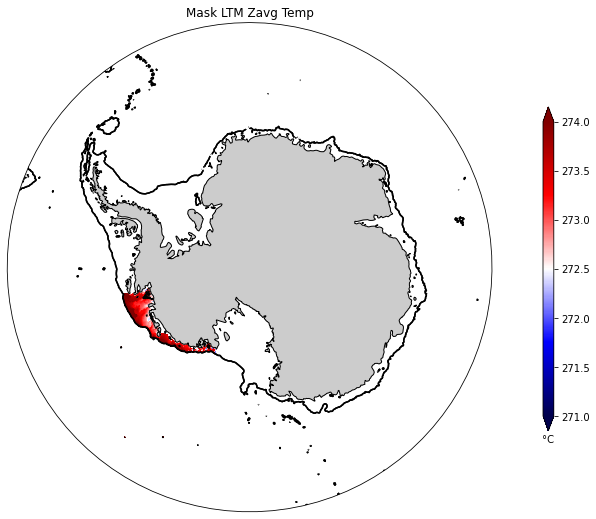

In [26]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

#anom=temp.where(tmask.tmask).sel(st_ocean=(200,700)).mean(dim='st_ocean')
#t=temp.isel(st_ocean=0)


p1 = ltm_temp_zavg.where(mb_mask.mb_mask).plot.pcolormesh(x='xt_ocean', y='yt_ocean', vmin=271, vmax=274, add_colorbar=False, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

#p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx73.values-decavg73_tx.values, ty73.values-decavg73_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('Mask LTM Zavg Temp')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');



In [27]:
#calculate area average from depth average
temp_zavg=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/temp_zavg_01_cycle1_200to500_58to17.nc',engine='netcdf4',decode_times=False)
temp_zavg.load()
print(temp_zavg)

<xarray.Dataset>
Dimensions:    (time: 60, xt_ocean: 3600, yt_ocean: 584)
Coordinates:
  * time       (time) int64 0 365 731 1096 1461 ... 20454 20819 21185 21550
  * xt_ocean   (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean   (yt_ocean) float64 -81.11 -81.07 -81.02 ... -55.12 -55.07 -55.01
Data variables:
    temp_zavg  (time, yt_ocean, xt_ocean) float64 nan nan nan ... 274.9 274.9


In [28]:
temp_avg = temp_zavg.where(tmask.tmask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
wap_temp_avg = temp_zavg.where(wap_mask.wap_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
bs_temp_avg = temp_zavg.where(bs_mask.bs_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
as_temp_avg = temp_zavg.where(as_mask.as_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))
mb_temp_avg = temp_zavg.where(mb_mask.mb_mask).weighted(area_t).mean(dim=('xt_ocean','yt_ocean'))

In [29]:
print(temp_avg.values)
print(wap_temp_avg.values)
print(bs_temp_avg.values)
print(as_temp_avg.values)
print(mb_temp_avg.values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (time: 60)
Coordinates:
  * time       (time) int64 0 365 731 1096 1461 ... 20454 20819 21185 21550
Data variables:
    temp_zavg  (time) float64 dask.array<chunksize=(60,), meta=np.ndarray>>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (time: 60)
Coordinates:
  * time       (time) int64 0 365 731 1096 1461 ... 20454 20819 21185 21550
Data variables:
    temp_zavg  (time) float64 dask.array<chunksize=(60,), meta=np.ndarray>>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (time: 60)
Coordinates:
  * time       (time) int64 0 365 731 1096 1461 ... 20454 20819 21185 21550
Data variables:
    temp_zavg  (time) float64 dask.array<chunksize=(60,), meta=np.ndarray>>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (time: 60)
Coordinates:
  * time       (time) int64 0 365 731 1096 1461 ... 20454 20819 21185 21550
Data variables:
    temp_zavg  (time) float64 dask.array<chunksize=(

In [30]:
temp_avg.temp_zavg.to_dataset(name='shelf_temp').to_netcdf('shelf_temp_200to500m_01_cycle2.nc')
wap_temp_avg.temp_zavg.to_dataset(name='wap_temp').to_netcdf('wap_temp_200to500m_01_cycle2.nc')
bs_temp_avg.temp_zavg.to_dataset(name='bs_temp').to_netcdf('bs_temp_200to500m_01_cycle2.nc')
as_temp_avg.temp_zavg.to_dataset(name='as_temp').to_netcdf('as_temp_200to500m_01_cycle2.nc')
mb_temp_avg.temp_zavg.to_dataset(name='mb_temp').to_netcdf('mb_temp_200to500m_01_cycle2.nc')

In [31]:
temp_avg.temp_zavg.shape

(60,)

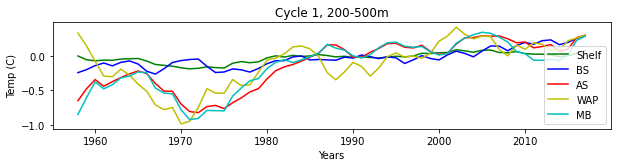

In [32]:
fig = plt.figure(figsize=(10, 9))

yrs=np.arange(1958,2018,1)

ts=(temp_avg-ltm_shelf_temp_avg).values
ts=(temp_avg-ltm_shelf_temp_avg).values

plt.subplot(411)
plt.plot(yrs,(temp_avg.temp_zavg-ltm_shelf_temp_avg).values,linestyle='-',color='g',label='Shelf',linewidth=1.5)
plt.plot(yrs,(bs_temp_avg.temp_zavg-ltm_bs_temp_avg).values,linestyle='-',color='b',label='BS',linewidth=1.5)
plt.plot(yrs,(as_temp_avg.temp_zavg-ltm_as_temp_avg).values,linestyle='-',color='r',label='AS',linewidth=1.5)
plt.plot(yrs,(wap_temp_avg.temp_zavg-ltm_wap_temp_avg).values,linestyle='-',color='y',label='WAP',linewidth=1.5)
plt.plot(yrs,(mb_temp_avg.temp_zavg-ltm_mb_temp_avg).values,linestyle='-',color='c',label='MB',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Temp (C)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Cycle 1, 200-500m')
plt.legend(fontsize=10)

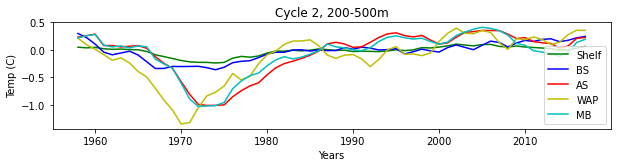

In [23]:
fig = plt.figure(figsize=(10, 9))

yrs=np.arange(1958,2018,1)

ts=(temp_avg-ltm_shelf_temp_avg).values
ts=(temp_avg-ltm_shelf_temp_avg).values

plt.subplot(411)
plt.plot(yrs,(temp_avg.temp_zavg-ltm_shelf_temp_avg).values,linestyle='-',color='g',label='Shelf',linewidth=1.5)
plt.plot(yrs,(bs_temp_avg.temp_zavg-ltm_bs_temp_avg).values,linestyle='-',color='b',label='BS',linewidth=1.5)
plt.plot(yrs,(as_temp_avg.temp_zavg-ltm_as_temp_avg).values,linestyle='-',color='r',label='AS',linewidth=1.5)
plt.plot(yrs,(wap_temp_avg.temp_zavg-ltm_wap_temp_avg).values,linestyle='-',color='y',label='WAP',linewidth=1.5)
plt.plot(yrs,(mb_temp_avg.temp_zavg-ltm_mb_temp_avg).values,linestyle='-',color='c',label='MB',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Temp (C)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Cycle 2, 200-500m')
plt.legend(fontsize=10)

In [30]:
shelf_t=np.zeros((60,2))
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/shelf_temp_200to500m_01_cycle1.nc',engine='netcdf4',decode_times=False)
shelf_t[:,0]=st.shelf_temp.load()
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/shelf_temp_200to500m_01_cycle2.nc',engine='netcdf4',decode_times=False)
shelf_t[:,1]=st.shelf_temp.load()
a=np.save('/g/data/v45/pas561/jnb/ensoant/data/01_cyc1to2_200to500_temp_shelf_ts.npy',shelf_t)


wap_t=np.zeros((60,2))
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/wap_temp_200to500m_01_cycle1.nc',engine='netcdf4',decode_times=False)
wap_t[:,0]=st.wap_temp.load()
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/wap_temp_200to500m_01_cycle2.nc',engine='netcdf4',decode_times=False)
wap_t[:,1]=st.wap_temp.load()
a=np.save('/g/data/v45/pas561/jnb/ensoant/data/01_cyc1to2_200to500_temp_wap_ts.npy',wap_t)


bs_t=np.zeros((60,2))
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/bs_temp_200to500m_01_cycle1.nc',engine='netcdf4',decode_times=False)
bs_t[:,0]=st.bs_temp.load()
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/bs_temp_200to500m_01_cycle2.nc',engine='netcdf4',decode_times=False)
bs_t[:,1]=st.bs_temp.load()
a=np.save('/g/data/v45/pas561/jnb/ensoant/data/01_cyc1to2_200to500_temp_bs_ts.npy',bs_t)

as_t=np.zeros((60,2))
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/as_temp_200to500m_01_cycle1.nc',engine='netcdf4',decode_times=False)
as_t[:,0]=st.as_temp.load()
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/as_temp_200to500m_01_cycle2.nc',engine='netcdf4',decode_times=False)
as_t[:,1]=st.as_temp.load()
a=np.save('/g/data/v45/pas561/jnb/ensoant/data/01_cyc1to2_200to500_temp_as_ts.npy',as_t)

mb_t=np.zeros((60,2))
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/mb_temp_200to500m_01_cycle1.nc',engine='netcdf4',decode_times=False)
mb_t[:,0]=st.mb_temp.load()
st=xr.open_dataset('/g/data/v45/pas561/jnb/ensoant/data/mb_temp_200to500m_01_cycle2.nc',engine='netcdf4',decode_times=False)
mb_t[:,1]=st.mb_temp.load()
a=np.save('/g/data/v45/pas561/jnb/ensoant/data/01_cyc1to2_200to500_temp_mb_ts.npy',mb_t)

In [11]:
expt='01deg_jra55v140_iaf_cycle2'

start = '1958-01-01 00:00:00'
end = '1978-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).resample(time='Y').mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
                                                                                                                     
print(temp.shape)

print(thickness.shape)

temp_zavg = (temp*thickness).sum('st_ocean')/thickness.sum('st_ocean')
temp_zavg_all = temp_zavg.load()

#temp_zavg.to_dataset(name='temp_zavg').to_netcdf('temp_zavg_025_cycle2_200to500_58to78.nc')

(21, 75, 584, 3600)
(9, 584, 3600)


In [12]:
start = '1979-01-01 00:00:00'
end = '1998-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).resample(time='Y').mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
                        #temp.load()
print(temp.shape)
print(thickness.shape)

temp_zavg = (temp*thickness).sum('st_ocean')/thickness.sum('st_ocean')
temp_zavg.load()

temp_zavg_all=xr.concat([temp_zavg_all, temp_zavg],dim='time')
print(temp_zavg_all.shape)

#temp_zavg.to_dataset(name='temp_zavg').to_netcdf('temp_zavg_025_cycle2_200to500_79to98.nc')

(20, 75, 584, 3600)
(9, 584, 3600)
(41, 584, 3600)


In [13]:
start = '1999-01-01 00:00:00'
end = '2017-12-31 00:00:00'
temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                        end_time=end).sel(yt_ocean=slice(-90,-55)).sel(time=slice(start,end)).resample(time='Y').mean(dim='time').chunk({'st_ocean':25, 'xt_ocean':1800})
                        #temp.load()
print(temp.shape)

print(thickness.shape)

temp_zavg = (temp*thickness).sum('st_ocean')/thickness.sum('st_ocean')
temp_zavg = temp_zavg.load()

temp_zavg_all=xr.concat([temp_zavg_all, temp_zavg],dim='time')
print(temp_zavg_all.shape)

temp_zavg_all.to_dataset(name='temp_zavg').to_netcdf('temp_zavg_01_cycle2_200to500_58to17.nc')

(19, 75, 584, 3600)
(9, 584, 3600)
(60, 584, 3600)


(75, 2700, 3600)

In [ ]:
expt='01deg_jra55v140_iaf'
start = '1971-01-01 00:00:00'
end = '2010-01-01 00:00:00'
ltm_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time').load()
ltm_tx.shape

ltm_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time').load()
ltm_ty.shape

Big El Nino event dates: 72/73, 82/83, 97/98, 15/16

#get decadal average around events
start = '1968-01-01 00:00:00'
end = '1978-01-01 00:00:00'
decavg73_cyc1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg73_cyc1_temp.shape

decavg73_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg73_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 72/72 event
start = '1978-01-01 00:00:00'
end = '1988-01-01 00:00:00'
decavg83_cyc1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg83_cyc1_temp.shape

decavg83_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg83_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 97/98 event
start = '1993-01-01 00:00:00'
end = '2003-01-01 00:00:00'
decavg98_cyc1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg98_cyc1_temp.shape

decavg98_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg98_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 15/16 event ... something wrong with the time dimension ...need ncfile="%monthly-mean%" to isolate files
start = '2008-01-01 00:00:00'
end = '2018-12-31 00:00:00'
decavg16_cyc1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg16_cyc1_temp.shape

decavg16_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg16_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


In [11]:
start = '1973-01-01 00:00:00'
end = '1974-01-01 00:00:00'
en73_c1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

tx73 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty73 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

start = '1983-01-01 00:00:00'
end = '1984-01-01 00:00:00'
en83_c1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx83 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty83 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '1998-01-01 00:00:00'
end = '1999-01-01 00:00:00'
en98_c1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx98 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty98 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '2016-01-01 00:00:00'
end = '2017-01-01 00:00:00'
en16_c1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx16 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty16 = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

anom73=en73_c1_temp.sel(st_ocean=200, method='nearest')-decavg73_cyc1_temp.sel(st_ocean=200, method='nearest')
anom73.load()
print(anom73.shape)

anom83=en83_c1_temp.sel(st_ocean=200, method='nearest')-decavg83_cyc1_temp.sel(st_ocean=200, method='nearest')
anom83.load()
print(anom83.shape)

anom98=en98_c1_temp.sel(st_ocean=200, method='nearest')-decavg98_cyc1_temp.sel(st_ocean=200, method='nearest')
anom98.load()
print(anom98.shape)

anom16=en16_c1_temp.sel(st_ocean=200, method='nearest')-decavg16_cyc1_temp.sel(st_ocean=200, method='nearest')
anom16.load()
print(anom16.shape)

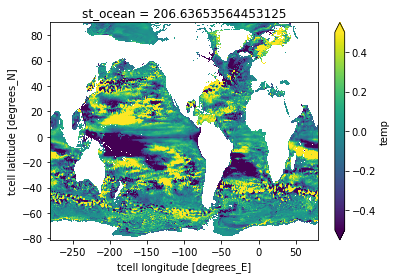

In [12]:
anom=en73_c1_temp.sel(st_ocean=200, method='nearest')-decavg73_cyc1_temp.sel(st_ocean=200, method='nearest')
anom.plot(vmin=-.5, vmax=+.5)

In [13]:
anom=en73_c1_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest').load()

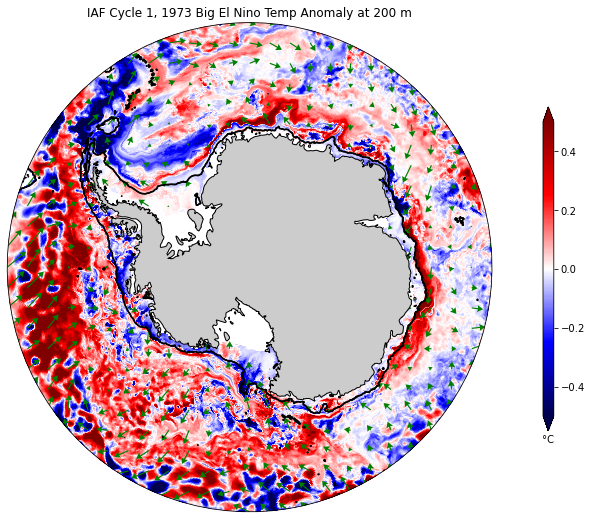

In [14]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

#anom=en73_c1_temp.sel(st_ocean=200, method='nearest')-decavg73_cyc1_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx73.values-ltm_tx.values, ty73.values-ltm_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 1, 1973 Big El Nino Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

(2700, 3600)


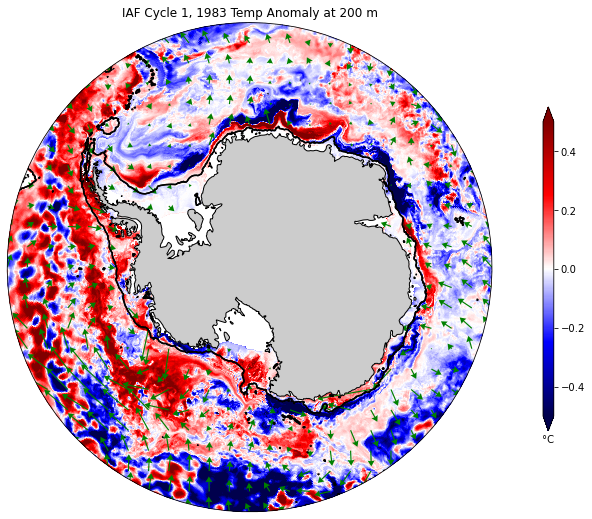

In [15]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=en83_c1_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest')
anom.load()
print(anom.shape)

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())
p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx83.values-ltm_tx.values, ty83.values-ltm_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 1, 1983 Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

(2700, 3600)


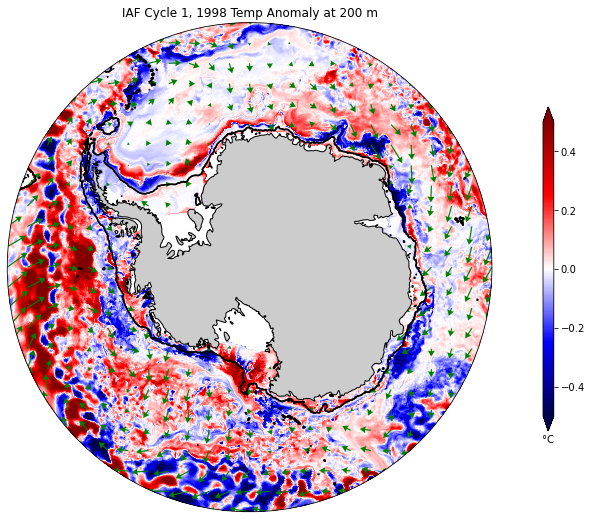

In [16]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=en98_c1_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest')
anom.load()
print(anom.shape)


p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx98.values-ltm_tx.values, ty98.values-ltm_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 1, 1998 Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

(2700, 3600)


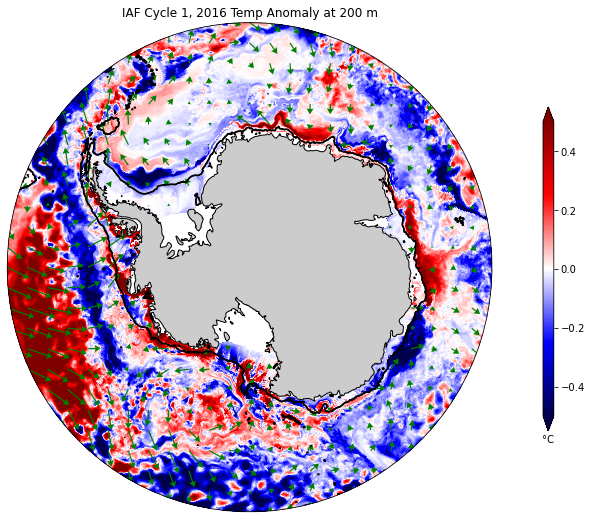

In [17]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=en16_c1_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest')
anom.load()
print(anom.shape)


p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())
p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx16.values-decavg16_tx.values, ty16.values-decavg16_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 1, 2016 Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

#Do cycle 2
#get decadal average around events
start = '1968-01-01 00:00:00'
end = '1978-01-01 00:00:00'
decavg73_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg73_temp.shape
decavg73_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg73_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 72/72 event
start = '1978-01-01 00:00:00'
end = '1988-01-01 00:00:00'
decavg83_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg83_temp.shape
decavg83_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg83_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 97/98 event
start = '1993-01-01 00:00:00'
end = '2003-01-01 00:00:00'
decavg98_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg98_temp.shape
decavg98_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg98_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 15/16 event ... something wrong with the time dimension ...need ncfile="%monthly-mean%" to isolate files
start = '2008-01-01 00:00:00'
end = '2018-12-31 00:00:00'
decavg16_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg16_temp.shape
decavg16_tx = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg16_ty = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

In [8]:
#get long-term average for cycle 2
expt='01deg_jra55v140_iaf_cycle2'
start = '1971-01-01 00:00:00'
end = '2010-01-01 00:00:00'
ltm_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time').sel(st_ocean=200, method='nearest').load()
ltm_temp.shape

(75, 2700, 3600)

In [ ]:
expt='01deg_jra55v140_iaf_cycle2'
start = '1971-01-01 00:00:00'
end = '2010-01-01 00:00:00'
ltm_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time').load()
ltm_tx.shape

ltm_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time').load()
ltm_ty.shape

In [19]:
start = '1973-01-01 00:00:00'
end = '1974-01-01 00:00:00'
en73_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

tx73 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty73 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '1983-01-01 00:00:00'
end = '1984-01-01 00:00:00'
en83_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx83 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty83 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '1998-01-01 00:00:00'
end = '1999-01-01 00:00:00'
en98_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

tx98 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty98 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')



start = '2016-01-01 00:00:00'
end = '2017-01-01 00:00:00'
en16_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

tx16 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty16 = cc.querying.getvar(expt='01deg_jra55v140_iaf_cycle2', variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


(2700, 3600)


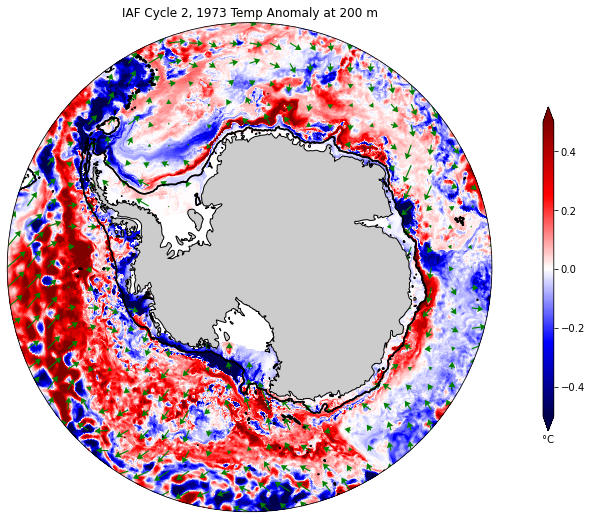

In [20]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=en73_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest')
anom.load()
print(anom.shape)

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())
p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx73.values-ltm_tx.values, ty73.values-ltm_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 2, 1973 Temp Anomaly at 200 m')


ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

(2700, 3600)


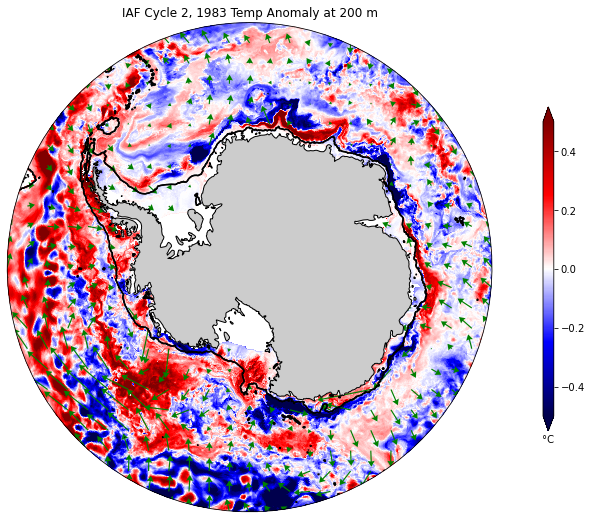

In [21]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=en83_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest')
anom.load()
print(anom.shape)

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())
p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx83.values-ltm_tx.values, ty83.values-ltm_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 2, 1983 Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

(2700, 3600)


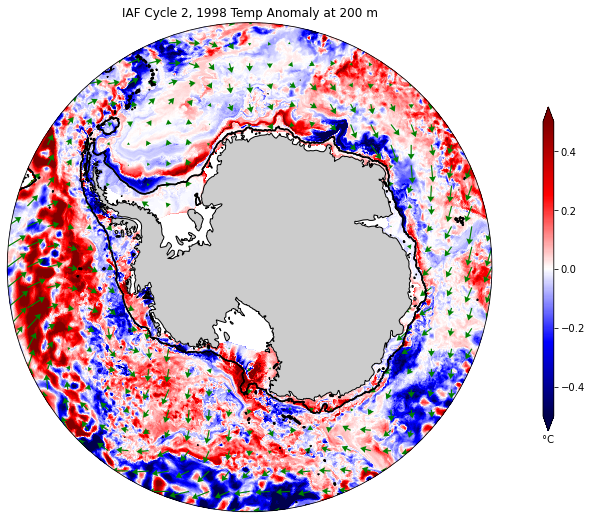

In [22]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=en98_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest')
anom.load()
print(anom.shape)

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())
p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx98.values-ltm_tx.values, ty98.values-ltm_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 2, 1998 Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

(2700, 3600)


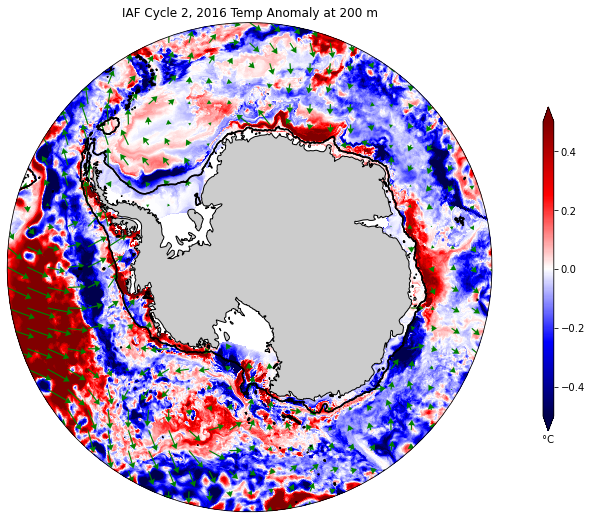

In [23]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=en16_temp.sel(st_ocean=200, method='nearest')-ltm_temp#.sel(st_ocean=200, method='nearest')
anom.load()
print(anom.shape)

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx16.values-ltm_tx.values, ty16.values-ltm_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())


plt.title('IAF Cycle 2, 2016 Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

Cycle 1: Big La Nina event dates: 88/89, 99/00, 07/08, 10/11

In [8]:
expt='01deg_jra55v140_iaf'

#get decadal average around events
start = '1984-01-01 00:00:00'
end = '1994-01-01 00:00:00'
decavg89_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg89_temp.shape

decavg89_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg89_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 72/72 event
start = '1995-01-01 00:00:00'
end = '2005-01-01 00:00:00'
decavg00_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg00_temp.shape

decavg00_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg00_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 97/98 event
start = '2003-01-01 00:00:00'
end = '2013-01-01 00:00:00'
decavg08_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg08_temp.shape

decavg08_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg08_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

start = '2006-01-01 00:00:00'
end = '2016-01-01 00:00:00'
decavg11_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg11_temp.shape

decavg11_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg11_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


In [10]:
#Big La Nina event dates: 88/89, 99/00, 07/08, 10/11
start = '1989-01-01 00:00:00'
end = '1990-01-01 00:00:00'
ln89_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

tx89 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty89 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

start = '2000-01-01 00:00:00'
end = '2001-01-01 00:00:00'
ln00_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx00 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty00 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '2008-01-01 00:00:00'
end = '2009-01-01 00:00:00'
ln08_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx08 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty08 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '2011-01-01 00:00:00'
end = '2012-01-01 00:00:00'
ln11_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx11 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty11 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

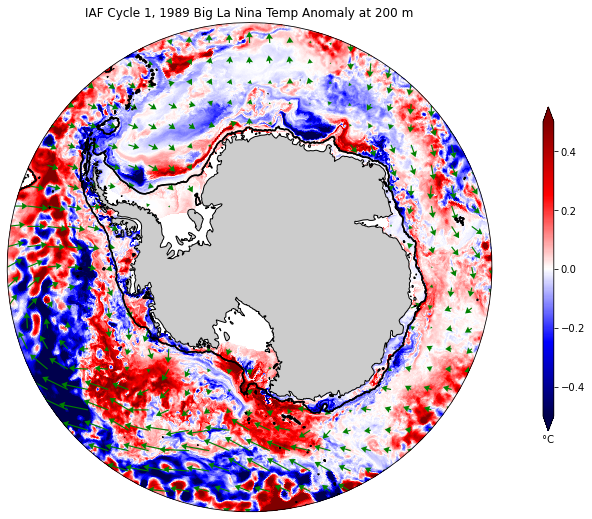

In [11]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln89_temp.sel(st_ocean=200, method='nearest')-decavg89_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx89.values-decavg89_tx.values, ty89.values-decavg89_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 1, 1989 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

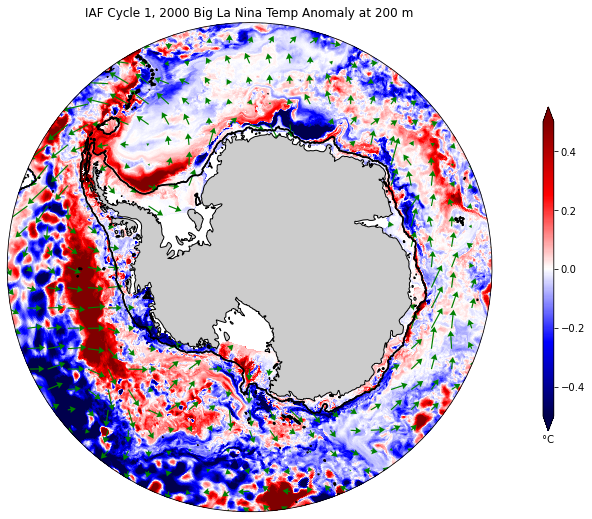

In [12]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln00_temp.sel(st_ocean=200, method='nearest')-decavg00_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx00.values-decavg00_tx.values, ty00.values-decavg00_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 1, 2000 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

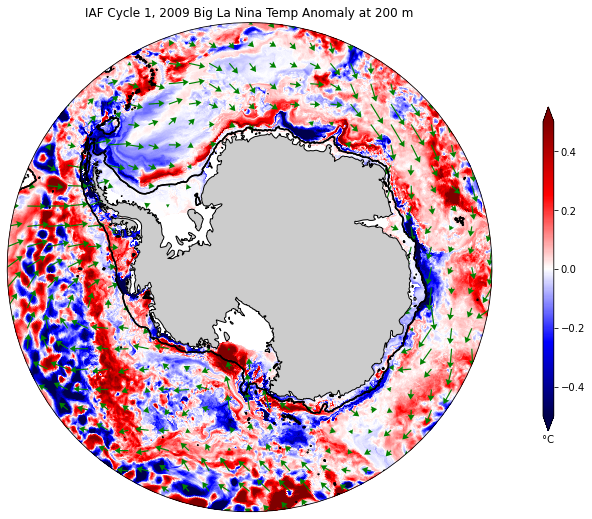

In [13]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln08_temp.sel(st_ocean=200, method='nearest')-decavg08_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx08.values-decavg08_tx.values, ty08.values-decavg08_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())
plt.title('IAF Cycle 1, 2009 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

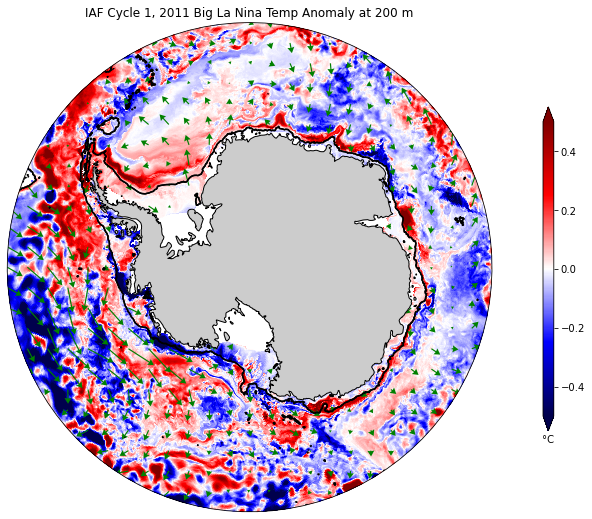

In [14]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln11_temp.sel(st_ocean=200, method='nearest')-decavg11_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx11.values-decavg11_tx.values, ty11.values-decavg11_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())
plt.title('IAF Cycle 1, 2011 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

Cycle 2: Big La Nina event dates: 88/89, 99/00, 07/08, 10/11

In [15]:
expt='01deg_jra55v140_iaf_cycle2'

In [16]:
#get decadal average around events
start = '1984-01-01 00:00:00'
end = '1994-01-01 00:00:00'
decavg89_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg89_temp.shape

decavg89_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg89_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 72/72 event
start = '1995-01-01 00:00:00'
end = '2005-01-01 00:00:00'
decavg00_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg00_temp.shape

decavg00_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg00_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


#get decadal average around 97/98 event
start = '2003-01-01 00:00:00'
end = '2013-01-01 00:00:00'
decavg08_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg08_temp.shape

decavg08_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg08_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

start = '2006-01-01 00:00:00'
end = '2016-01-01 00:00:00'
decavg11_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg11_temp.shape

decavg11_tx = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg11_ty = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


In [17]:
#Big La Nina event dates: 88/89, 99/00, 07/08, 10/11
start = '1989-01-01 00:00:00'
end = '1990-01-01 00:00:00'
ln89_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

tx89 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty89 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

start = '2000-01-01 00:00:00'
end = '2001-01-01 00:00:00'
ln00_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx00 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty00 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '2008-01-01 00:00:00'
end = '2009-01-01 00:00:00'
ln08_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx08 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty08 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')


start = '2011-01-01 00:00:00'
end = '2012-01-01 00:00:00'
ln11_temp = cc.querying.getvar(expt, variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
tx11 = cc.querying.getvar(expt, variable='tau_x', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
ty11 = cc.querying.getvar(expt, variable='tau_y', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%",
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')

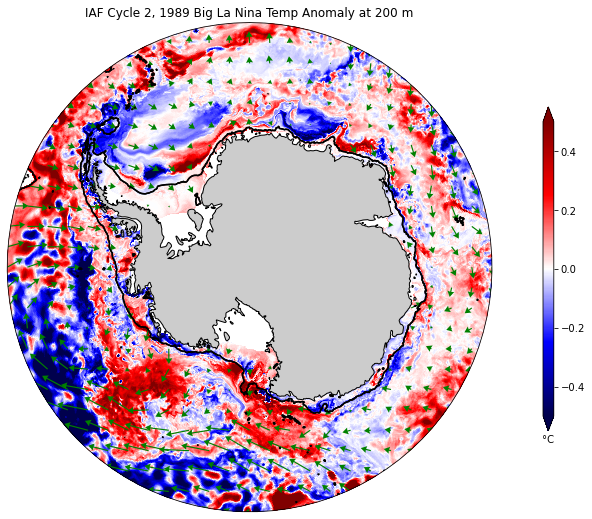

In [18]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln89_temp.sel(st_ocean=200, method='nearest')-decavg89_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx89.values-decavg89_tx.values, ty89.values-decavg89_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 2, 1989 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

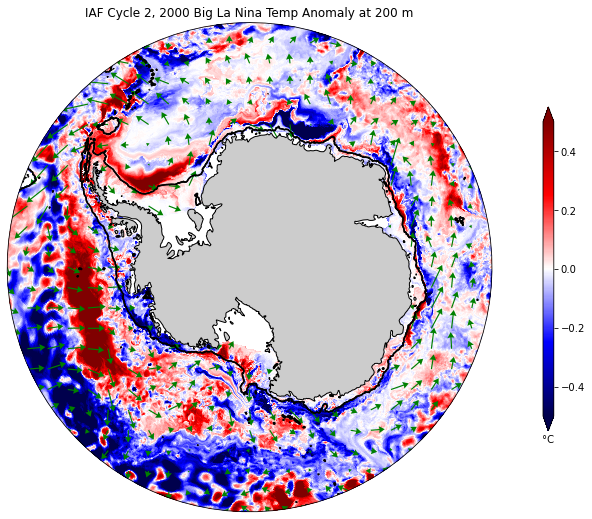

In [19]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln00_temp.sel(st_ocean=200, method='nearest')-decavg00_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx00.values-decavg00_tx.values, ty00.values-decavg00_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('IAF Cycle 2, 2000 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

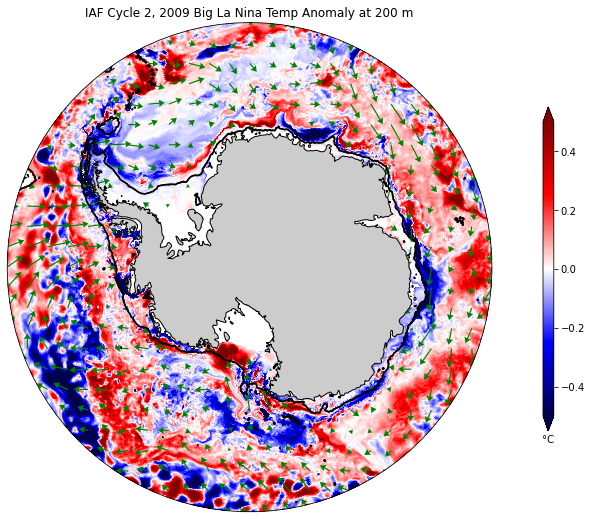

In [20]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln08_temp.sel(st_ocean=200, method='nearest')-decavg08_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx08.values-decavg08_tx.values, ty08.values-decavg08_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())
plt.title('IAF Cycle 2, 2009 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');

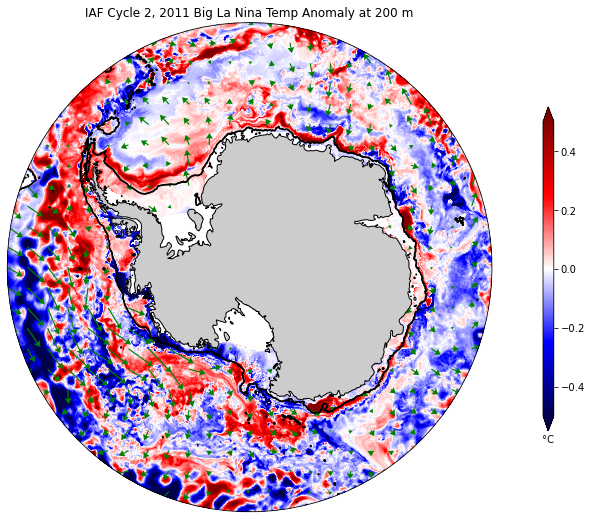

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [21]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

anom=ln11_temp.sel(st_ocean=200, method='nearest')-decavg11_temp.sel(st_ocean=200, method='nearest')

p1 = anom.plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=-.5, vmax=.5, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx11.values-decavg11_tx.values, ty11.values-decavg11_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())
plt.title('IAF Cycle 2, 2011 Big La Nina Temp Anomaly at 200 m')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');